In [134]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
data = pd.read_csv(r'C:\Users\tnamr\Downloads\spambase\spambase.data')

In [125]:
data.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [126]:
#data = data.values

In [127]:
data.shape

(4600, 58)

In [128]:
data.columns

Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', '1'],
      dtype='object')

In [129]:
data.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [130]:
X = data.iloc[:,:57]
y = data.iloc[:,57]
# test_x = data.iloc[:,:57]
# test_y = data.iloc[:,57]
# val_x = data.iloc[:2300,:57]
# val_y = data.iloc[:2300,57]

In [131]:
# set to 10 folds
skf = KFold(n_splits=10)

# blank lists to store predicted values and actual values
predicted_y1 = []
predicted_y2 = []
expected_y1 = []
expected_y2 = []
predicted_y3 = []
expected_y3 = []

# partition data
for train_index, test_index in skf.split(x, y):
    # specific ".loc" syntax for working with dataframes
    x_train, x_test = x.loc[train_index], x.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

   # create and fit classifier
    classifier1 = GaussianNB()
    classifier2 = MultinomialNB()
    classifier1.fit(x_train, y_train)
    classifier2.fit(x_train, y_train)
    clf = SVC(gamma='auto')
    clf.fit(x_train, y_train) 

    # store result from classification
    predicted_y1.extend(classifier.predict(x_test))
    predicted_y2.extend(classifier.predict(x_test))
    predicted_y3.extend(clf.predict(x_test))

    # store expected result for this specific fold
    expected_y1.extend(y_test)
    expected_y2.extend(y_test)
    expected_y3.extend(y_test)

# save and print accuracy
accuracy = accuracy_score(expected_y1, predicted_y1)
print("Accuracy via GuassianNB: " + accuracy.__str__())
accuracy = accuracy_score(expected_y2, predicted_y2)
print("Accuracy via MultinomialNB: " + accuracy.__str__())
accuracy = accuracy_score(expected_y3, predicted_y3)
print("Accuracy via SVM: " + accuracy.__str__())

Accuracy via GuassianNB: 0.8228260869565217
Accuracy via MultinomialNB: 0.8228260869565217
Accuracy via SVM: 0.7513043478260869


In [132]:
#visualize clusters
t = TSNE(n_components=2, random_state = 0)
X_embedded = t.fit_transform(X)
print(X_embedded.shape)

(4600, 2)


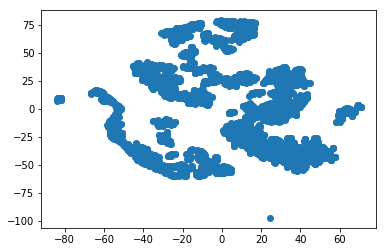

In [141]:
fig, pl = plt.subplots()
vis_x = X_embedded[:, 0]
vis_y = X_embedded[:, 1]
#plotting each dot
pl.scatter(vis_x, vis_y)
plt.show()